## Performance of equal-weight XLV buy and hold (same amount of money in every stock) over 22-year period

In [1]:
from preprocess import prep_all_movavg, prep_movavg_mod
from tradesim_sma_daily import getprice, getsma, sma_target, get_next_date, one_cycle_buy_sell, simulate, sim_buy_hold_eq
from tradesim_sma import getprice, getsma, sma_target, get_next_date, one_cycle_buy_sell, simulate, simulate_xlv
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()
df_dict = prep_movavg_mod(tick_list)

In [3]:
start = pd.to_datetime('12/22/98')
end = pd.to_datetime('01/06/21')

In [4]:
funds = 1000000

In [5]:
funds, current_val, fund_df = sim_buy_hold_eq(funds, df_dict, start, end)

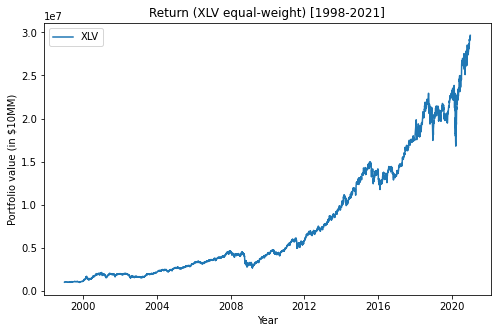

In [58]:
# full period plot (xlv but equal dollar investment in all underlying)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV')
ax.legend()
ax.set_title('Return (XLV equal-weight) [1998-2021]')
plt.savefig('XLV_equal_invest_22_Year_Return.png')

In [59]:
fund_df_pct = fund_df.iloc[::252,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

In [60]:
#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
fund_df_pct = fund_df_pct - risk_free

In [61]:
mean = fund_df_pct.mean()
stdev = fund_df_pct.std()

mean,stdev

(curr_fund    0.167307
 dtype: float64,
 curr_fund    0.219454
 dtype: float64)

In [62]:
fund_sharpe = mean / stdev

In [63]:
fund_sharpe

curr_fund    0.762377
dtype: float64

In [32]:
fund_df

,date,curr_fund,num_stocks
0,1998-12-22,1.000000e+06,49
1,1998-12-23,1.010958e+06,49
2,1998-12-24,1.013110e+06,49
3,1998-12-28,1.022077e+06,49
4,1998-12-29,1.028488e+06,49
...,...,...,...
5540,2020-12-29,2.925777e+07,63
5541,2020-12-30,2.925387e+07,63
5542,2020-12-31,2.956776e+07,63
5543,2021-01-04,2.936469e+07,63


In [36]:
fund_df_pct

,curr_fund
date,
1999-12-22,0.091340
2000-12-20,0.761653
2001-12-27,-0.019240
2002-12-27,-0.221625
2003-12-29,0.354879
2004-12-29,0.226680
2005-12-28,0.151004
2006-12-28,0.106799
2007-12-31,0.255663


In [37]:
funds = 1000000
days = 21
cycle = 264
date = pd.to_datetime('12/22/98')

In [38]:
xlv_df, xlv_funds = simulate_xlv(funds, date, days, cycle)

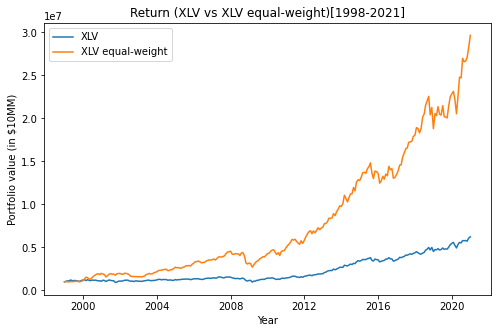

In [57]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(xlv_df['date'], xlv_df['curr_fund'], label='XLV')
ax.plot(xlv_df['date'], fund_df.iloc[::21,:]['curr_fund'], label='XLV equal-weight')
ax.legend()
ax.set_title('Return (XLV vs XLV equal-weight)[1998-2021]')
plt.savefig('XLV_comp_22_Year_Return.png')

In [44]:
xlv_df

,date,curr_fund,num_stocks
0,1998-12-22,1000000,0
1,1999-01-25,1074175.824176,1
2,1999-02-24,1097252.747253,1
3,1999-03-25,1123626.373626,1
4,1999-04-26,1212087.912088,1
...,...,...,...
260,2020-09-03,5782417.582418,1
261,2020-10-05,5796703.296703,1
262,2020-11-03,5725824.175824,1
263,2020-12-03,6071978.021978,1
